# 1 Author

**Student Name**: Abhimanyu Wadhwa

**Student ID**: 220861447


---






# 2 Problem formulation


Using the MLEnd London Sounds Dataset to build a ML Pipeline that takes as an input an audio segment and predicts whether it has been recorded indoors or outdoors. 
The interesting thing to note here is that how many predictors can we take to solve this problem and build a solution.
We will see below how complex an audio signal can be and will take steps to reduce the dimensionality.

---




# 3 Machine Learning Pipeline

---

We have used the MLEnd London Sounds dataset, consisting of 2500 audio files and extracted features from it such as pitch and spectral centroid. Then, using Librosa library, we extract meaningful features from it. We have split the dataset into two, namely the training dataset and the test dataset and finally obtain the accuracy after fitting a suitable model (in this case SVM) to it. 
This is shown graphically in the image below.

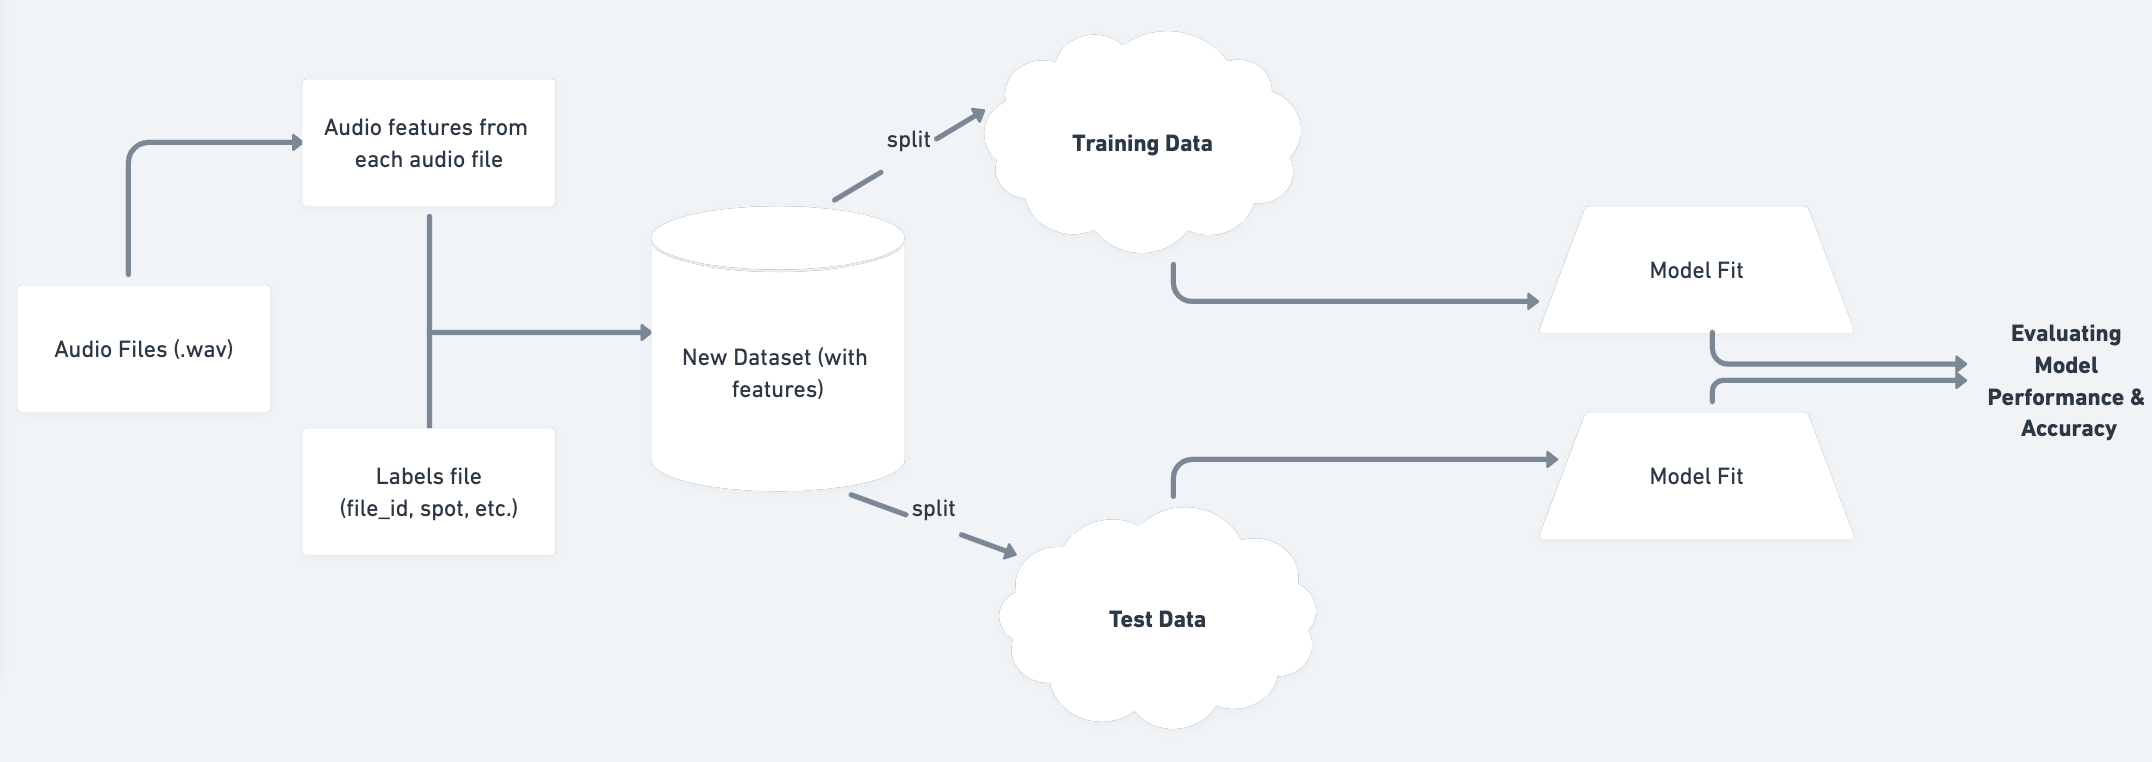

The following few cells will be useful in the preparation of our dataset, and understanding the format of nomenclature in our files.

In [3]:
# Importing useful libraries and mounting our Google Drive to Colab ->

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# The code in this cell is used to extract the zip folders, but has been commented out since we don't want that
# happening more than once. We used it the first time we ran our notebook.


# Extracting the the 5 Folders ->


#directory_to_extract_to = '/content/drive/MyDrive/Data-MiniProject/MLEndLS/'
#zip_path1 = '/content/drive/MyDrive/Data-MiniProject/MLEndLS/MLEndLS_1.zip'
#zip_path2 = '/content/drive/MyDrive/Data-MiniProject/MLEndLS/MLEndLS_2.zip'
#zip_path3 = '/content/drive/MyDrive/Data-MiniProject/MLEndLS/MLEndLS_3.zip'
#zip_path4 = '/content/drive/MyDrive/Data-MiniProject/MLEndLS/MLEndLS_4.zip'
#zip_path5 = '/content/drive/MyDrive/Data-MiniProject/MLEndLS/MLEndLS_5.zip'

#with zipfile.ZipFile(zip_path1, 'r') as zip_ref1:
 #     zip_ref1.extractall(directory_to_extract_to)
#with zipfile.ZipFile(zip_path2, 'r') as zip_ref2:
 #     zip_ref2.extractall(directory_to_extract_to)
#with zipfile.ZipFile(zip_path3, 'r') as zip_ref3:
 #     zip_ref3.extractall(directory_to_extract_to)
#with zipfile.ZipFile(zip_path4, 'r') as zip_ref4:
      #zip_ref4.extractall(directory_to_extract_to)
#with zipfile.ZipFile(zip_path5, 'r') as zip_ref5:
      #zip_ref5.extractall(directory_to_extract_to)

In [5]:
# Checking if our Drive folder contains the required DataSet zip files, and listing the contents of the folder ->

path = '/content/drive/MyDrive/Data-MiniProject/MLEndLS'
os.listdir(path)

['1001.wav',
 '1002.wav',
 '1003.wav',
 '1004.wav',
 '1005.wav',
 '1006.wav',
 '1007.wav',
 '1008.wav',
 '1009.wav',
 '1010.wav',
 '1011.wav',
 '1012.wav',
 '1013.wav',
 '1014.wav',
 '1015.wav',
 '1016.wav',
 '1017.wav',
 '1018.wav',
 '1019.wav',
 '1020.wav',
 '1021.wav',
 '1022.wav',
 '1023.wav',
 '1024.wav',
 '1025.wav',
 '1026.wav',
 '1027.wav',
 '1028.wav',
 '1029.wav',
 '1030.wav',
 '1031.wav',
 '1032.wav',
 '1033.wav',
 '1034.wav',
 '1035.wav',
 '1036.wav',
 '1037.wav',
 '1038.wav',
 '1039.wav',
 '1040.wav',
 '1041.wav',
 '1042.wav',
 '1043.wav',
 '1044.wav',
 '1045.wav',
 '1046.wav',
 '1047.wav',
 '1048.wav',
 '1049.wav',
 '1050.wav',
 '1051.wav',
 '1052.wav',
 '1053.wav',
 '1054.wav',
 '1055.wav',
 '1056.wav',
 '1057.wav',
 '1058.wav',
 '1059.wav',
 '1060.wav',
 '1061.wav',
 '1062.wav',
 '1063.wav',
 '1064.wav',
 '1065.wav',
 '1066.wav',
 '1067.wav',
 '1068.wav',
 '1069.wav',
 '1070.wav',
 '1071.wav',
 '1072.wav',
 '1073.wav',
 '1074.wav',
 '1075.wav',
 '1076.wav',
 '1077.wav',

In [7]:
# Checking the number of files present ->

sample_path = '/content/drive/MyDrive/Data-MiniProject/MLEndLS/*.wav'
files = glob.glob(sample_path)
len(files)

2500

As we can see from the above cell's output, we have 2500 .wav files in our dataset.

Note that we may have files in our dataset that may be corrupt or may not be able to run properly, hence we have used a 'try:' block in our code inside the getXy function.
A try block is used for handling exceptions in programming. It ensures that our program is not terminated abruptly due to an exception.

In [8]:
# Reading the MLEndLS.csv file below which shows us the 5 attributes associated to each audio file, which are
# file_id, area, spot, in_out and Participant ->

MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


In [9]:
# We will now print the file names in our dataset, in order to cross-check if they match with the CSV ->

for file in files:
  print(file.split('/')[-1])

1001.wav
1002.wav
1003.wav
1004.wav
1005.wav
1006.wav
1007.wav
1008.wav
1009.wav
1010.wav
1011.wav
1012.wav
1013.wav
1014.wav
1015.wav
1016.wav
1017.wav
1018.wav
1019.wav
1020.wav
1021.wav
1022.wav
1023.wav
1024.wav
1025.wav
1026.wav
1027.wav
1028.wav
1029.wav
1030.wav
1031.wav
1032.wav
1033.wav
1034.wav
1035.wav
1036.wav
1037.wav
1038.wav
1039.wav
1040.wav
1041.wav
1042.wav
1043.wav
1044.wav
1045.wav
1046.wav
1047.wav
1048.wav
1049.wav
1050.wav
1051.wav
1052.wav
1053.wav
1054.wav
1055.wav
1056.wav
1057.wav
1058.wav
1059.wav
1060.wav
1061.wav
1062.wav
1063.wav
1064.wav
1065.wav
1066.wav
1067.wav
1068.wav
1069.wav
1070.wav
1071.wav
1072.wav
1073.wav
1074.wav
1075.wav
1076.wav
1077.wav
1078.wav
1079.wav
1080.wav
1081.wav
1082.wav
1083.wav
1084.wav
1085.wav
1086.wav
1087.wav
1088.wav
1089.wav
1090.wav
1091.wav
1092.wav
1093.wav
1094.wav
1095.wav
1096.wav
1097.wav
1098.wav
1099.wav
1100.wav
1101.wav
1102.wav
1103.wav
1104.wav
1105.wav
1106.wav
1107.wav
1108.wav
1109.wav
1110.wav
1111.wav
1

In [11]:
# The code below gives us the area and spot along with their value counts (i.e number of recordings in that area_spot) ->

MLENDLS_df['area_spot'] = MLENDLS_df['area'] + "_" + MLENDLS_df['spot']
MLENDLS_df['area_spot'].value_counts()

campus_square          142
campus_ground          139
campus_canal           137
campus_curve           136
campus_reception       136
campus_library         133
westend_piazza         116
westend_charing        113
westend_market         112
westend_national       110
westend_trafalgar      109
westend_leicester      106
british_greatcourt      84
british_room12          83
british_forecourt       82
british_street          77
british_square          77
Euston_library          41
southbank_waterloo      41
Euston_upper            41
Euston_gardens          41
Euston_forecourt        40
southbank_skate         40
southbank_bridge        40
southbank_food          39
southbank_book          36
Euston_ritblat          36
Euston_piazza           35
southbank_royal         33
kensington_albert       26
kensington_hintze       26
kensington_dinosaur     25
kensington_marine       24
kensington_pond         22
kensington_cromwell     21
british_room13           1
Name: area_spot, dtype: int6

In [12]:
# This cell shows us only the spots with their value counts ->

MLENDLS_df['spot'].value_counts()

square        219
library       174
piazza        151
ground        139
canal         137
curve         136
reception     136
forecourt     122
charing       113
market        112
national      110
trafalgar     109
leicester     106
greatcourt     84
room12         83
street         77
waterloo       41
upper          41
gardens        41
bridge         40
skate          40
food           39
book           36
ritblat        36
royal          33
albert         26
hintze         26
dinosaur       25
marine         24
pond           22
cromwell       21
room13          1
Name: spot, dtype: int64

In [13]:
# Displaying the areas ->

MLENDLS_df['area'].unique()

array(['british', 'kensington', 'campus', 'westend', 'Euston',
       'southbank'], dtype=object)

In [14]:
# Displaying the spots ->

MLENDLS_df['spot'].unique()

array(['street', 'dinosaur', 'square', 'hintze', 'piazza', 'upper',
       'canal', 'forecourt', 'greatcourt', 'reception', 'leicester',
       'waterloo', 'room12', 'pond', 'national', 'library', 'skate',
       'market', 'book', 'ground', 'charing', 'trafalgar', 'curve',
       'ritblat', 'bridge', 'marine', 'food', 'albert', 'cromwell',
       'gardens', 'royal', 'room13'], dtype=object)

# 4 Transformation Stage 

---





## Data Preprocessing ->

In [15]:
# We have used the sklearn preprocessing library here ->


from sklearn.preprocessing import LabelBinarizer
df = MLENDLS_df.copy()
result_df = pd.get_dummies(df,
                     columns = ['area','in_out','spot'])
  
display(result_df)

,Participant,area_spot,area_Euston,area_british,area_campus,area_kensington,area_southbank,area_westend,in_out_indoor,in_out_outdoor,...,spot_ritblat,spot_room12,spot_room13,spot_royal,spot_skate,spot_square,spot_street,spot_trafalgar,spot_upper,spot_waterloo
file_id,,,,,,,,,,,,,,,,,,,,,
0001.wav,S151,british_street,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
0002.wav,S127,kensington_dinosaur,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0003.wav,S18,campus_square,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
0004.wav,S179,kensington_hintze,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0005.wav,S176,campus_square,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496.wav,S151,westend_trafalgar,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2497.wav,S6,campus_square,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2498.wav,S96,westend_national,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
result_df.columns

Index(['Participant', 'area_spot', 'area_Euston', 'area_british',
       'area_campus', 'area_kensington', 'area_southbank', 'area_westend',
       'in_out_indoor', 'in_out_outdoor', 'spot_albert', 'spot_book',
       'spot_bridge', 'spot_canal', 'spot_charing', 'spot_cromwell',
       'spot_curve', 'spot_dinosaur', 'spot_food', 'spot_forecourt',
       'spot_gardens', 'spot_greatcourt', 'spot_ground', 'spot_hintze',
       'spot_leicester', 'spot_library', 'spot_marine', 'spot_market',
       'spot_national', 'spot_piazza', 'spot_pond', 'spot_reception',
       'spot_ritblat', 'spot_room12', 'spot_room13', 'spot_royal',
       'spot_skate', 'spot_square', 'spot_street', 'spot_trafalgar',
       'spot_upper', 'spot_waterloo'],
      dtype='object')

In [17]:
# Let us see the relevant metrics about the dataset ->

result_df.describe()

,area_Euston,area_british,area_campus,area_kensington,area_southbank,area_westend,in_out_indoor,in_out_outdoor,spot_albert,spot_book,...,spot_ritblat,spot_room12,spot_room13,spot_royal,spot_skate,spot_square,spot_street,spot_trafalgar,spot_upper,spot_waterloo
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.0000,2500.000000,2500.0000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000
mean,0.09360,0.161600,0.329200,0.057600,0.091600,0.266400,0.472400,0.527600,0.010400,0.014400,...,0.014400,0.033200,0.0004,0.013200,0.0160,0.087600,0.03080,0.043600,0.016400,0.016400
std,0.29133,0.368157,0.470017,0.233032,0.288518,0.442164,0.499338,0.499338,0.101469,0.119157,...,0.119157,0.179194,0.0200,0.114153,0.1255,0.282769,0.17281,0.204244,0.127033,0.127033
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,1.000000


In [18]:
cov_matrix = pd.DataFrame.cov(result_df)
print(cov_matrix)

                 area_Euston  area_british  area_campus  area_kensington  \
area_Euston         0.084873     -0.015132    -0.030825        -0.005394   
area_british       -0.015132      0.135540    -0.053220        -0.009312   
area_campus        -0.030825     -0.053220     0.220916        -0.018970   
area_kensington    -0.005394     -0.009312    -0.018970         0.054304   
area_southbank     -0.008577     -0.014808    -0.030167        -0.005278   
area_westend       -0.024945     -0.043067    -0.087734        -0.015351   
in_out_indoor       0.002985     -0.009143     0.008889         0.002791   
in_out_outdoor     -0.002985      0.009143    -0.008889        -0.002791   
spot_albert        -0.000974     -0.001681    -0.003425         0.009805   
spot_book          -0.001348     -0.002328    -0.004742        -0.000830   
spot_bridge        -0.001498     -0.002587    -0.005269        -0.000922   
spot_canal         -0.005131     -0.008859     0.036775        -0.003158   
spot_charing

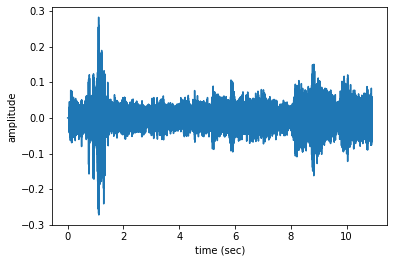

In [19]:
# We will plot one of the audio signals ->

n=0
fs = None # This is the sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

# Feature extraction : Pitch

In [20]:
# Defining a function to get the pitch from the audio signals ->

def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

# Feature extraction : Spectral Centroid

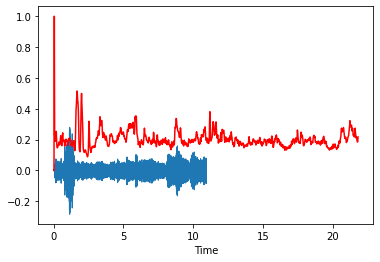

In [21]:
#Spectral Centroid -- centre of mass -- weighted mean of the frequencies present in the sound ->

import sklearn
import librosa.display
spectral_centroids = librosa.feature.spectral_centroid(x, sr= fs)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
    
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, fs)
plt.plot(t, normalize(spectral_centroids), color='r')

# 5 Modelling 

---






For this problem, we have used the SVM (Support Vector Machine) Machine Learning model. 


*   SVM can be used for both classification and regression problems.
*  Another advantage of using SVM here is that it reduces the execution time of our model.


*   It is suitable since our dataset is not extremely large.







# 6 Methodology

---
In this case, we will use the 'accuracy' metric to assess the performance of our model. The code cell below shows us how complex an audio signal can be, by giving us the number of samples present in it.




In [22]:
# Using the code below, we can find out the complexity of the audio signals ->

n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 481131 samples


# 7 Dataset 

---




In [23]:
# The function below creates a NumPy array containg the four audio features (predictors i.e x) and a binary label (y)
# that shows us whether the recording is from indoors or outdoors. 

def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]


    try:

      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)

      if scale_audio: 
        x = x/np.max(np.abs(x))


      yi = labels_file.loc[fileID]['in_out']=='indoor'

    
    
    
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)
      mfccs = librosa.feature.mfcc(x, sr=fs)
      spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=fs)

      xi = [power,pitch_mean,pitch_std,voiced_fr, np.mean(spectral_rolloff), np.mean(mfccs)]
      X.append(xi)
      y.append(yi)

    except: 
      print('Issue in file with the index ->' + str(file))
      

  return np.array(X),np.array(y)

In [24]:
# All 2500 files ->

X,y = getXy(files[0:2499], labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

 28%|██▊       | 705/2499 [20:06<52:48,  1.77s/it]<ipython-input-23-3e1a15f9806b>:17: RuntimeWarning: invalid value encountered in true_divide
  x = x/np.max(np.abs(x))
 28%|██▊       | 706/2499 [20:06<39:09,  1.31s/it]

Issue in file with the index ->/content/drive/MyDrive/Data-MiniProject/MLEndLS/2206.wav


 80%|████████  | 2000/2499 [1:02:22<13:02,  1.57s/it]

Issue in file with the index ->/content/drive/MyDrive/Data-MiniProject/MLEndLS/0033.wav


100%|██████████| 2499/2499 [1:18:49<00:00,  1.89s/it]


In [25]:
# Printing the shape of x and y and the labels vector y ->

print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (2497, 6)
The shape of y is (2497,)
The labels vector is [ True False False ...  True False False]


In [26]:
# Now we come to the final step for our problem, categorising the audio files (indoors/outdoors) ->

print(' The number of indoor recordings is: ', np.count_nonzero(y))
print(' The number of outdoor recordings is: ', y.size - np.count_nonzero(y))

 The number of indoor recordings is:  1181
 The number of outdoor recordings is:  1316


As we can see, 1181 of the files have been recorded indoors while 1316 have been recorded outdoors. This is the solution to the first part of our Mini Project. 
In the following cells, we will use SVM to build the prediction model and then see a few things about the accuracy of our Machine Learning Model.
We will also see how normalizing the predictors could lead to the improvement in performance of the model. 

# SVM ->

In [27]:
# Using SVM to build our prediction model ->

In [28]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1747, 6), (750, 6), (1747,), (750,))

In [29]:
# Fitting the SVM model ->

model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5374928448769318
Validation  Accuracy 0.5026666666666667
The support vectors are (1620, 6)


In [30]:
# Normalizing predictors -> 

mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.8672009158557528
Validation  Accuracy 0.6773333333333333
The support vectors are (1485, 6)


# Logistic Regression ->

In [31]:
# Logistic Regression -> (Let us see if we can get a better accuracy using this model)

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

62.34

In [33]:
yt_p = logreg.predict(X_train)
yv_p = logreg.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.6233543216943331
Validation  Accuracy 0.628


 **Note:** We can see that there is pretty much negligible difference between the training and validation accuracies if we use the logistic regression model. Hence, Logistic regression is a better fit here.

# 8 Results

---





In [35]:
# Categorising the audio files (indoors/outdoors) ->

print(' The number of indoor recordings is: ', np.count_nonzero(y))
print(' The number of outdoor recordings is: ', y.size - np.count_nonzero(y))

 The number of indoor recordings is:  1181
 The number of outdoor recordings is:  1316


As we can see, 1181 of the files have been recorded indoors while 1317 have been recorded outdoors. This is the solution to the first part of our Mini Project. 


# 9 Conclusion

---



We can conclude the following from the project:


*   SVM is a very good model for this use case.
*   We managed to achieve a training accuracy of 0.8 and a validation accuracy of 0.67, after normalizing the predictors.
*   The number of indoor recordings is 1181, while the number of outdoor recordings is 1316.




